# CNN

## libreries


In [42]:
from keras.models import Sequential
from tensorflow.keras import Input

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import matplotlib.pyplot as plt
import numpy as np

## Creating network


In [43]:

clasificador = Sequential()

In [44]:
clasificador.add(Input(shape = (64,64,3)))

In [45]:
# layer 1 - convultional
clasificador.add(
    Conv2D(
        filters = 32,
        kernel_size = (3, 3),
        activation = "relu"
    )
)

In [46]:
# layer 2 - pooling
clasificador.add(
    MaxPooling2D(pool_size = (2,2))
)

In [47]:
# layer 3 - convultional
clasificador.add(
    Conv2D(
        filters = 32,
        kernel_size = (3, 3),
        activation = "relu"
    )
)

In [48]:
# layer 4 - pooling
clasificador.add(
    MaxPooling2D(pool_size = (2,2))
)

In [49]:
#layer 5 - flattening
clasificador.add(
    Flatten()
)

In [50]:
# layer 6 - dense
clasificador.add(
    Dense(
        units = 128,
        activation = "relu"
    )
)

In [51]:
# layer 7 - exit
clasificador.add(
    Dense(
        units = 1,
        activation = "sigmoid"
    )
)

In [52]:

clasificador.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

## Import pictures

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [54]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    shear_range = 0.2, 
    zoom_range = 0.2, 
    horizontal_flip = True 
)
test_datagen = ImageDataGenerator(
    rescale = 1/255
)

In [55]:
training_set = train_datagen.flow_from_directory(
    "dataset/training_set",
    target_size = (64, 64),
    batch_size = 32,
    class_mode = "binary"
)

Found 8048 images belonging to 2 classes.


In [56]:
test_set = test_datagen.flow_from_directory(
    "dataset/test_set",
    target_size = (64, 64),
    batch_size = 32,
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.


In [57]:
images, labels = next(training_set)

In [58]:
images[0].shape

(64, 64, 3)

In [59]:
images[0]

array([[[0.83921576, 0.8431373 , 0.85098046],
        [0.83921576, 0.8431373 , 0.85098046],
        [0.8320032 , 0.83592474, 0.8437679 ],
        ...,
        [0.5921569 , 0.54509807, 0.39607847],
        [0.6039216 , 0.5294118 , 0.40000004],
        [0.6039216 , 0.5294118 , 0.40000004]],

       [[0.83921576, 0.8431373 , 0.85098046],
        [0.83921576, 0.8431373 , 0.85098046],
        [0.8319893 , 0.83591086, 0.843754  ],
        ...,
        [0.5921569 , 0.54509807, 0.39607847],
        [0.6039216 , 0.5294118 , 0.40000004],
        [0.6039216 , 0.5294118 , 0.40000004]],

       [[0.83921576, 0.8431373 , 0.85098046],
        [0.83921576, 0.8431373 , 0.85098046],
        [0.8319754 , 0.83589697, 0.8437401 ],
        ...,
        [0.5921569 , 0.54509807, 0.39607847],
        [0.6039216 , 0.5294118 , 0.40000004],
        [0.6039216 , 0.5294118 , 0.40000004]],

       ...,

       [[0.8352942 , 0.81568635, 0.7372549 ],
        [0.8352942 , 0.81568635, 0.7372549 ],
        [0.8542516 , 0

In [60]:
labels[1]

1.0

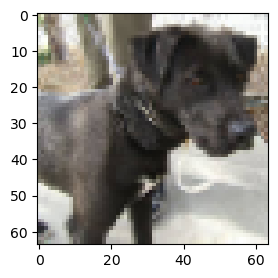

In [61]:
plt.figure(figsize = (3,3))
plt.imshow(images[1])
plt.show()

In [62]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [63]:
# X_train -> pictures
# y_train -> labels

## Training model

In [64]:
8048 / 32

251.5

In [65]:
2000 / 32

62.5

In [66]:
clasificador.fit(
    training_set,
    steps_per_epoch = 251,
    epochs = 25,    
    validation_data = test_set,
    validation_steps = 62 
)

Epoch 1/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 117ms/step - accuracy: 0.5437 - loss: 0.6938 - val_accuracy: 0.6678 - val_loss: 0.6198
Epoch 2/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - accuracy: 0.6562 - loss: 0.7980 - val_accuracy: 0.5625 - val_loss: 0.6811
Epoch 3/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 27s 106ms/step - accuracy: 0.6766 - loss: 0.6092 - val_accuracy: 0.6845 - val_loss: 0.5971
Epoch 4/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - accuracy: 0.6562 - loss: 0.5649 - val_accuracy: 0.8125 - val_loss: 0.4969
Epoch 5/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 27s 107ms/step - accuracy: 0.6995 - loss: 0.5609 - val_accuracy: 0.7303 - val_loss: 0.5405
Epoch 6/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step - accuracy: 0.7500 - loss: 0.4924 - val_accuracy: 0.8125 - val_loss: 0.4522
Epoch 7/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 28s 108ms/step - accuracy: 0.7346 - loss: 0.5374 - val_accuracy: 0.7374 - val_loss: 0.5254
Epoch 8/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - accuracy: 0.7500 - loss: 0.489

## Validating model

In [67]:
from tensorflow.keras.preprocessing import image

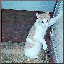

In [73]:
test_image = image.load_img("dataset/test_set/cats/cat.4001.jpg", target_size = (64,64))
test_image

In [74]:
test_image = image.img_to_array(test_image)

In [75]:
test_image.shape

(64, 64, 3)

In [76]:
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 64, 64, 3)

In [77]:
test_image = test_image / 255

In [78]:
resultado = clasificador.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


In [79]:
# cat -> 0
# dog -> 1
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [80]:
if resultado[0][0] > 0.5:
    print("This is a dog")
else:
    print("This is a cat")

This is a dog


In [81]:
resultado

array([[0.7626294]], dtype=float32)